# Mobile Phone Price Analiysis

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv("Mobile phone price.csv")
data = dt.copy()

In [3]:
data

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


# Data Preprocessing

In [4]:
data.shape

(407, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [6]:
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [7]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

## Fix wrong values in columns

In [8]:
data["RAM "].value_counts()

4GB      68
6GB      59
8GB      42
4        35
8        34
6        28
4 GB     25
3GB      22
6 GB     20
8 GB     19
12       11
12GB      9
2GB       9
3         9
3 GB      7
12 GB     5
5GB       2
2 GB      1
16        1
2         1
Name: RAM , dtype: int64

In [9]:
data["RAM "] = data["RAM "].str.replace(" GB", "")
data["RAM "] = data["RAM "].str.replace("GB", "")

In [10]:
data["RAM "].value_counts()

4     128
6     107
8      95
3      38
12     25
2      11
5       2
16      1
Name: RAM , dtype: int64

In [11]:
data["Storage "].value_counts()

128GB     125
128        74
128 GB     51
64GB       49
32GB       27
256        23
64         18
64 GB      16
256GB      10
256 GB      7
32 GB       3
512         3
32          1
Name: Storage , dtype: int64

In [12]:
data["Storage "] = data["Storage "].str.replace(" GB", "")
data["Storage "] = data["Storage "].str.replace("GB", "")

In [13]:
data["Storage "].value_counts()

128    250
64      83
256     40
32      31
512      3
Name: Storage , dtype: int64

In [14]:
data["Price ($)"].value_counts()

$149     18
$199     15
$279     15
$299     14
699      13
         ..
$309      1
$389      1
259       1
$109      1
1049      1
Name: Price ($), Length: 89, dtype: int64

In [15]:
data["Price ($)"] = data["Price ($)"].str.replace(r"$", "", regex = True)
data["Price ($)"] = data["Price ($)"].str.replace(" ", "")
data["Price ($)"] = data["Price ($)"].str.replace(",", "")

In [16]:
data["Price ($)"].value_counts()

199     28
279     24
179     22
299     21
399     21
149     20
249     20
699     19
329     17
449     16
799     14
999     12
229     11
139     10
499      9
1199     8
99       8
269      7
219      7
169      7
1099     7
159      7
189      7
599      7
349      7
239      6
129      5
899      5
369      4
749      4
429      4
319      4
119      3
1299     3
549      3
969      2
289      2
469      2
1399     2
649      2
729      2
379      2
209      2
419      1
1999     1
130      1
339      1
459      1
849      1
309      1
389      1
109      1
359      1
659      1
529      1
259      1
1049     1
Name: Price ($), dtype: int64

In [17]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


## Object to Int

In [19]:
data["Storage "] = data["Storage "].astype(int)
data["RAM "] = data["RAM "].astype(int)
data["Price ($)"] = data["Price ($)"].astype(int)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    int32 
 3   RAM                     407 non-null    int32 
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 20.8+ KB


# Visualization

# The most expensive phone models

In [21]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799


In [22]:
most_expensive_model = data.groupby("Model")["Price ($)"].sum().sort_values(ascending = False)[0:10]
most_expensive_model

Model
iPhone 11 Pro Max      3297
9 Pro                  2837
iPhone XR              2695
iPhone 11              2646
Galaxy S20 Ultra 5G    2598
Galaxy S21 Ultra 5G    2398
Galaxy S21             2397
iPhone 13              2397
X70 Pro+               2198
P40 Pro                2098
Name: Price ($), dtype: int32

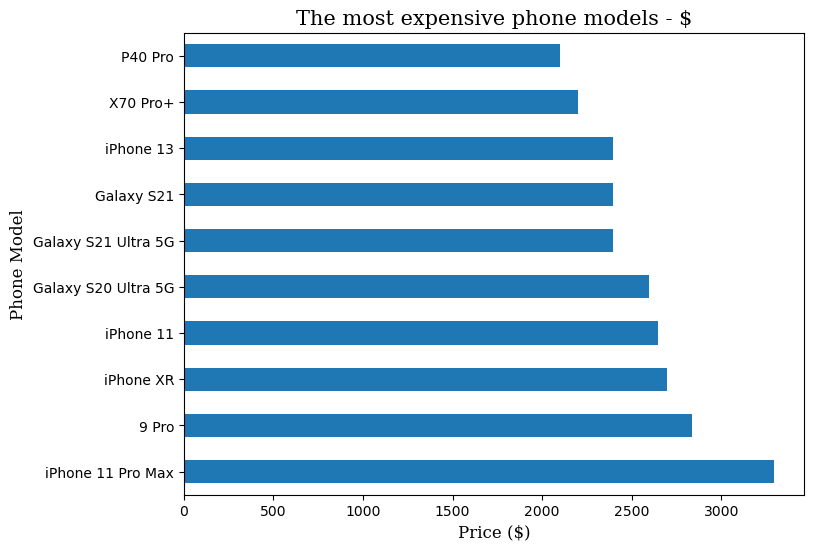

In [23]:
f, ax = plt.subplots(figsize = (8,6))
most_expensive_model.plot(kind = "barh")
plt.title("The most expensive phone models - $", fontfamily = "serif", size = 15)
plt.xlabel("Price ($)", fontfamily = "serif", size = 12)
plt.ylabel("Phone Model", fontfamily = "serif", size = 12)
plt.show()

# Average prices of different brands

In [24]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799


In [25]:
data["Brand"].value_counts()

Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: Brand, dtype: int64

In [26]:
brand_prices = data.groupby("Brand")["Price ($)"].mean()
brand_prices

Brand
Apple          745.666667
Asus           874.000000
Blackberry     499.000000
CAT            299.000000
Google         699.000000
Huawei         783.166667
LG             615.666667
Motorola       278.130435
Nokia          244.714286
OnePlus        644.333333
Oppo           376.142857
Realme         206.906977
Samsung        480.405063
Sony          1299.000000
Vivo           323.000000
Xiaomi         282.880597
Name: Price ($), dtype: float64

In [27]:
brand_prices.index

Index(['Apple', 'Asus', 'Blackberry', 'CAT', 'Google', 'Huawei', 'LG',
       'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Samsung', 'Sony',
       'Vivo', 'Xiaomi'],
      dtype='object', name='Brand')

In [28]:
brand_prices.values

array([ 745.66666667,  874.        ,  499.        ,  299.        ,
        699.        ,  783.16666667,  615.66666667,  278.13043478,
        244.71428571,  644.33333333,  376.14285714,  206.90697674,
        480.40506329, 1299.        ,  323.        ,  282.88059701])

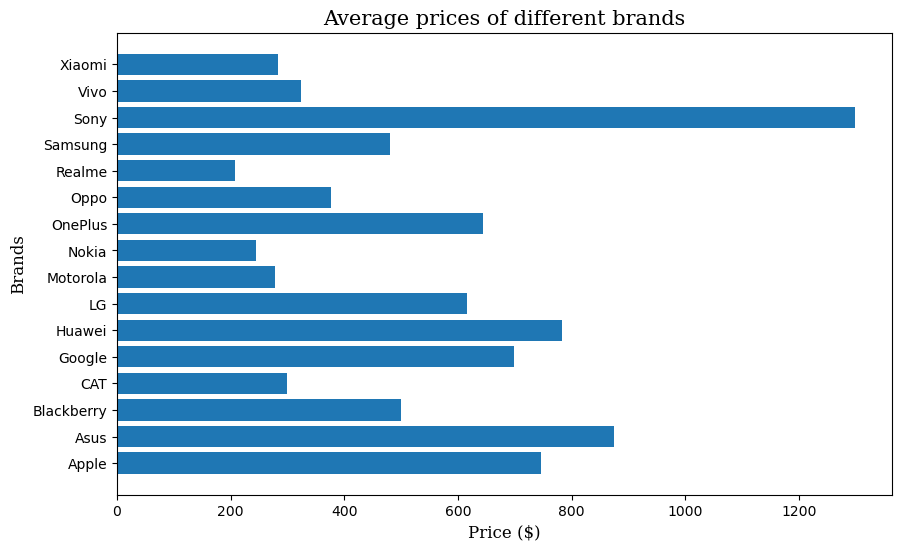

In [29]:
f, ax = plt.subplots(figsize = (10,6))
plt.barh(brand_prices.index, brand_prices.values)
plt.title("Average prices of different brands", fontfamily = "serif", size = 15)
plt.xlabel("Price ($)", fontfamily = "serif", size = 12)
plt.ylabel("Brands", fontfamily = "serif", size = 12)
plt.show()

In [30]:
explode = [0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0,0,0.1,0,0]

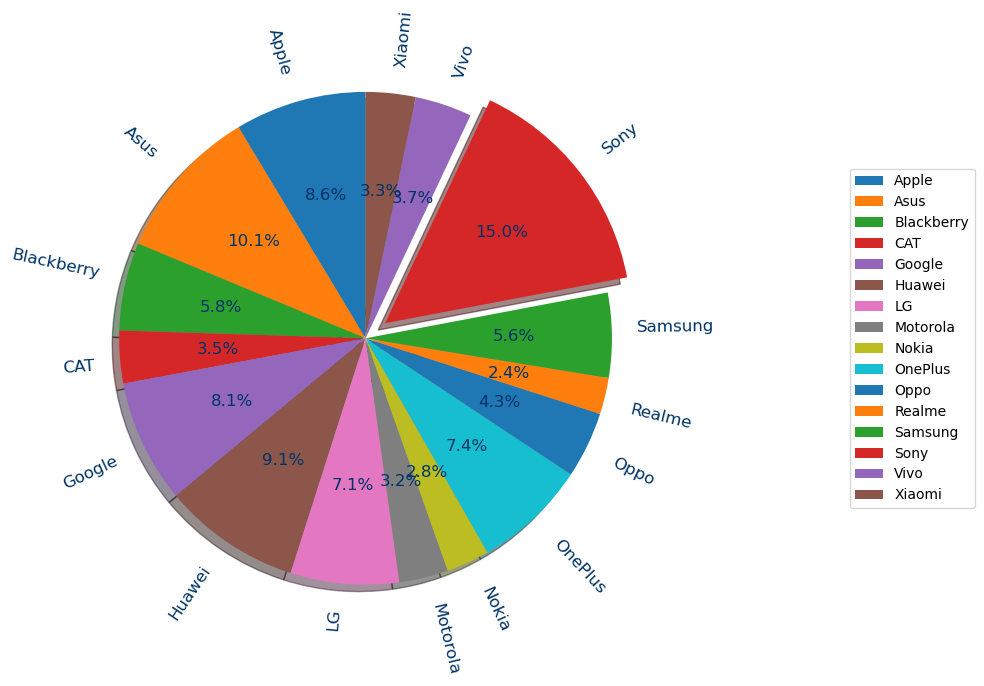

In [31]:
f, ax = plt.subplots(figsize = (12,8))
plt.pie(brand_prices.values, labels = brand_prices.index, 
        explode = explode, autopct = "%1.1f%%", shadow = True, startangle = 90,
        textprops={'fontsize': 12,'color':"#003366"}, rotatelabels=45)
plt.legend(loc="center right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Phone Prices and Storage Space (Colored Scatter Plot)

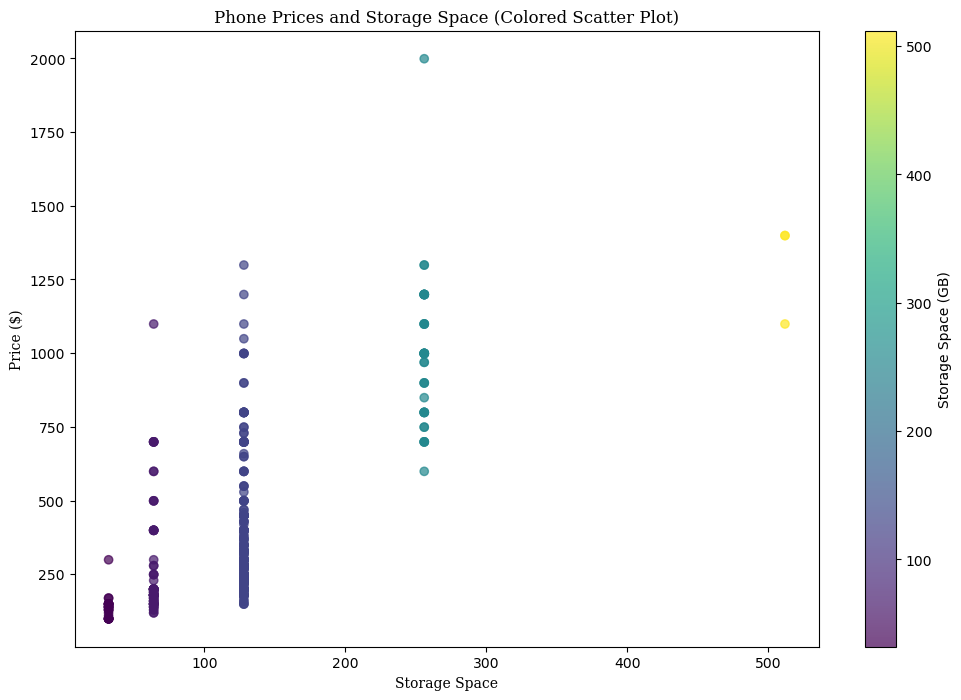

In [32]:
f, ax = plt.subplots(figsize = (12,8))
plt.scatter(data['Storage '], data['Price ($)'], c=data['Storage '], cmap='viridis', alpha=0.7)
plt.xlabel('Storage Space', fontfamily = "serif")
plt.ylabel('Price ($)', fontfamily = "serif")
plt.title('Phone Prices and Storage Space (Colored Scatter Plot)', fontfamily = "serif")
plt.colorbar(label='Storage Space (GB)')
plt.show()

# Screen Size and Battery Capacity

In [33]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.4,50 + 12.2,4614,799


## Delete Outliers

In [34]:
data["Screen Size (inches)"].value_counts()

6.5               108
6.67               30
6.4                26
6.7                25
6.55               21
6.43               21
6.51               19
6.1                16
6.53               16
6.58               14
6.6                14
6.52               14
6.8                 9
6.44                8
6.39                7
4.7                 5
6.81                5
6                   4
6.3                 4
6.82                4
6.2                 4
6.78                4
5.4                 3
6.62                3
6.9                 3
4.5                 2
5.5                 2
6.49                2
6.72                2
7.6 (unfolded)      1
6.15                1
6.47                1
5.7                 1
6.8 + 3.9           1
6.76                1
6.35                1
6.22                1
5.99                1
5.9                 1
6.56                1
6.57                1
Name: Screen Size (inches), dtype: int64

In [35]:
data[data["Screen Size (inches)"] == "7.6 (unfolded)"]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
373,Samsung,Galaxy Z Fold2 5G,256,12,7.6 (unfolded),12+12+12,4500,1999


In [36]:
data[data["Screen Size (inches)"] == "6.8 + 3.9"]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
88,LG,Wing,256,8,6.8 + 3.9,64MP + 13MP + 12MP,4000,999


In [37]:
data.drop(index = 373, inplace = True)

In [38]:
data.drop(index = 88, inplace = True)

In [39]:
data = data.reset_index(drop = True)

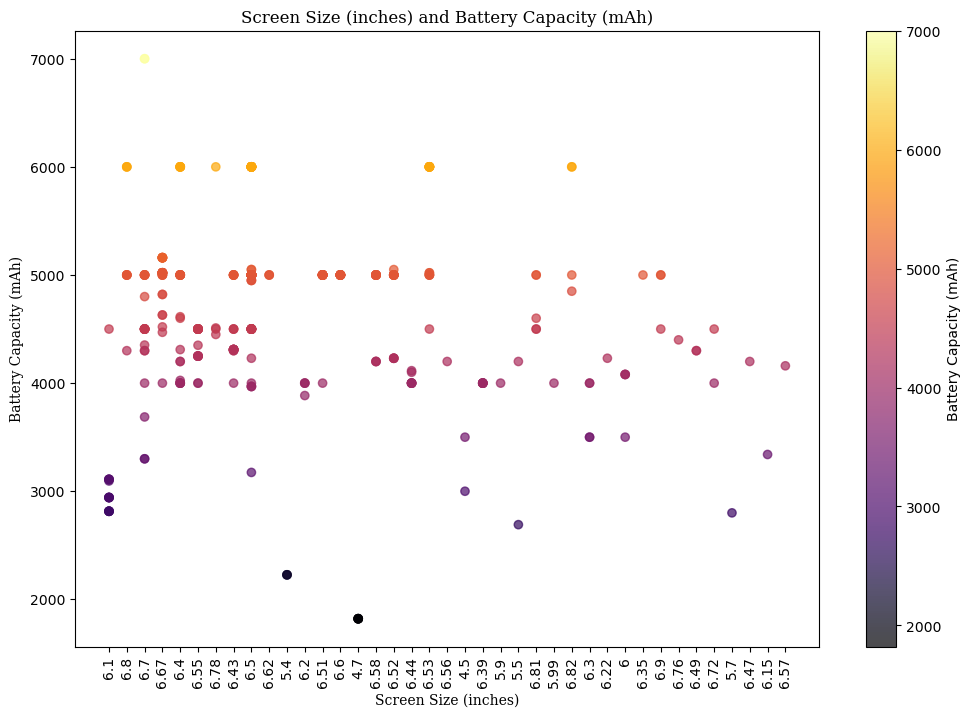

In [40]:
f, ax = plt.subplots(figsize = (12,8))
plt.scatter(data['Screen Size (inches)'], data['Battery Capacity (mAh)'],
            c=data['Battery Capacity (mAh)'], cmap='inferno', alpha=0.7)
plt.xticks(rotation = 90)
plt.xlabel('Screen Size (inches)', fontfamily = "serif")
plt.ylabel('Battery Capacity (mAh)', fontfamily = "serif")
plt.title('Screen Size (inches) and Battery Capacity (mAh)', fontfamily = "serif")
plt.colorbar(label='Battery Capacity (mAh)')
plt.show()